In [13]:
import cv2

from matplotlib import pyplot as plt


In [2]:
img_file = cv2.imread('train/captcha_1.jpeg')

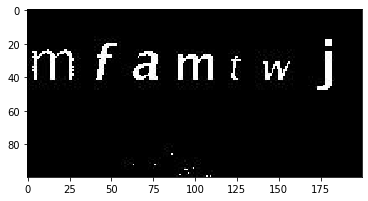

In [3]:

plt.imshow(img_file[:,:,::-1])
plt.show()
#img_file[1:10,1:10]

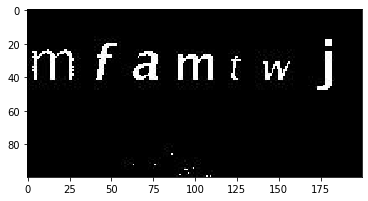

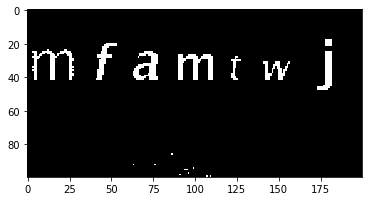

In [4]:
# for y in img_file.shape[0]:
#     for x in img_file.shape[1]:
#         if x[0]>0:
            
gray = cv2.cvtColor(img_file, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
plt.imshow(thresh,cmap='gray')
plt.show()

In [7]:
# im2, ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [6]:
#cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
thresh.shape

(100, 200)

In [ ]:
ul=[0,0];lr=[0,0]
for y in thresh.shape[1]:
    for x in thresh.shape[0]:
        if thresh[x][y]>0:
            ul = [y,x]          
            lr = [y,x]
        while
            

In [1]:
import cv2
import numpy as np
import sys
from itertools import combinations
from PIL import Image 

In [7]:
img_file = cv2.imread('train/captcha_1.jpeg')

#image = cv2.cvtColor(img_file, cv2.COLOR_BGR2GRAY)
output_g = cv2.cvtColor(img_file, cv2.COLOR_BGR2GRAY)

#upper = np.array([255,255,255],dtype=np.uint8)
#lower = np.array([200,200,200],dtype=np.uint8)

#mask = cv2.inRange(image, lower, upper)
#output = cv2.bitwise_and(image, image, mask = mask)

#output_g = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)


ValueError: not enough values to unpack (expected 3, got 2)

In [16]:
ret,thresh = cv2.threshold(output_g,127,255,0)

im = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[2]
plt.imshow(im,cmap='gray')
plt.show()


IndexError: tuple index out of range

In [10]:
im2,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
colors = [(0,255,0),(255,0,0),(0,0,255)]
coordinates=[]
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    coordinates.append((x,y,w,h))
coordinates.sort(key=lambda x:x[0])
print(coordinates)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
def extract_characters(image_file):
    image = cv2.imread(image_file)
    
    upper = np.array([255,255,255],dtype=np.uint8)
    lower = np.array([200,200,200],dtype=np.uint8)

    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)

    output_g = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    
    ret,thresh = cv2.threshold(output_g,127,255,0)
    im2,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    colors = [(0,255,0),(255,0,0),(0,0,255)]
    coordinates=[]
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        coordinates.append((x,y,w,h))
    coordinates.sort(key=lambda x:x[0])
    print(coordinates)
    c_copy = coordinates[:]

    comb = combinations(list(range(len(coordinates))),2)
    for com in comb:
        curr = c_copy[com[0]]
        curr2 = c_copy[com[1]]
        if curr not in coordinates or curr2 not in coordinates:
            continue
        print("Comparing: "+str(curr) + " with "+str(curr2))
        if (curr2[0] >= curr[0] and curr2[1] >= curr[1] and curr2[0]+curr2[2] <= curr[0]+curr[2] and curr2[1]+curr2[3] <= curr[1] + curr[3]):
                print("Removing 1:" + str(curr2))
                coordinates.remove(curr2)
        elif (curr2[0] >= curr[0] and curr2[0]+curr2[2] <= curr[0]+curr[2] and curr2[1] <= curr[1] and curr2[1]+curr2[3] <= curr[1] + curr[3]):
                print("Removing 2:" + str(curr2))
                ind = coordinates.index(curr)
                coordinates[ind] = (curr[0],curr2[1],curr[2],(curr[1]+curr[3])-curr2[1])
                coordinates.remove(curr2)
                


    digits = []
    for coord in coordinates:
        crop_img = output_g[coord[1]:coord[1]+coord[3], coord[0]:coord[0]+coord[2]]
        digits.append(crop_img)
    return image, digits, coordinates

filename = sys.argv[1]
image, characters, coordinates = extract_characters(filename)
if len(characters) != 6:
    print("Error")
    raise Exception